In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [ ]:


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:

history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10


1875/1875 [==============================] - 8s 3ms/step - loss: 0.6404 - accuracy: 0.8329 - val_loss: 0.3073 - val_accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2882 - accuracy: 0.9195 - val_loss: 0.2471 - val_accuracy: 0.9304
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2371 - accuracy: 0.9329 - val_loss: 0.2145 - val_accuracy: 0.9379
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2045 - accuracy: 0.9419 - val_loss: 0.1876 - val_accuracy: 0.9432
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1806 - accuracy: 0.9485 - val_loss: 0.1698 - val_accuracy: 0.9476
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1617 - accuracy: 0.9538 - val_loss: 0.1558 - val_accuracy: 0.9518
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1459 - accuracy: 0.9589 - val_loss: 0.1417 - val_accurac

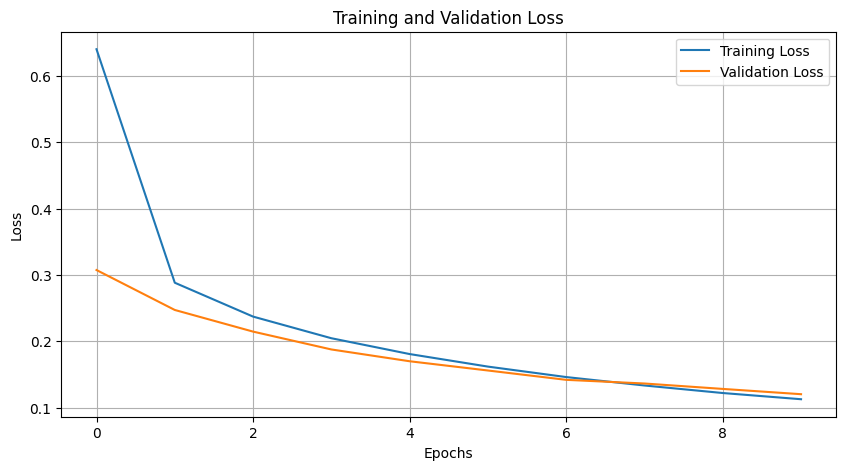

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)


313/313 [==============================] - 1s 1ms/step


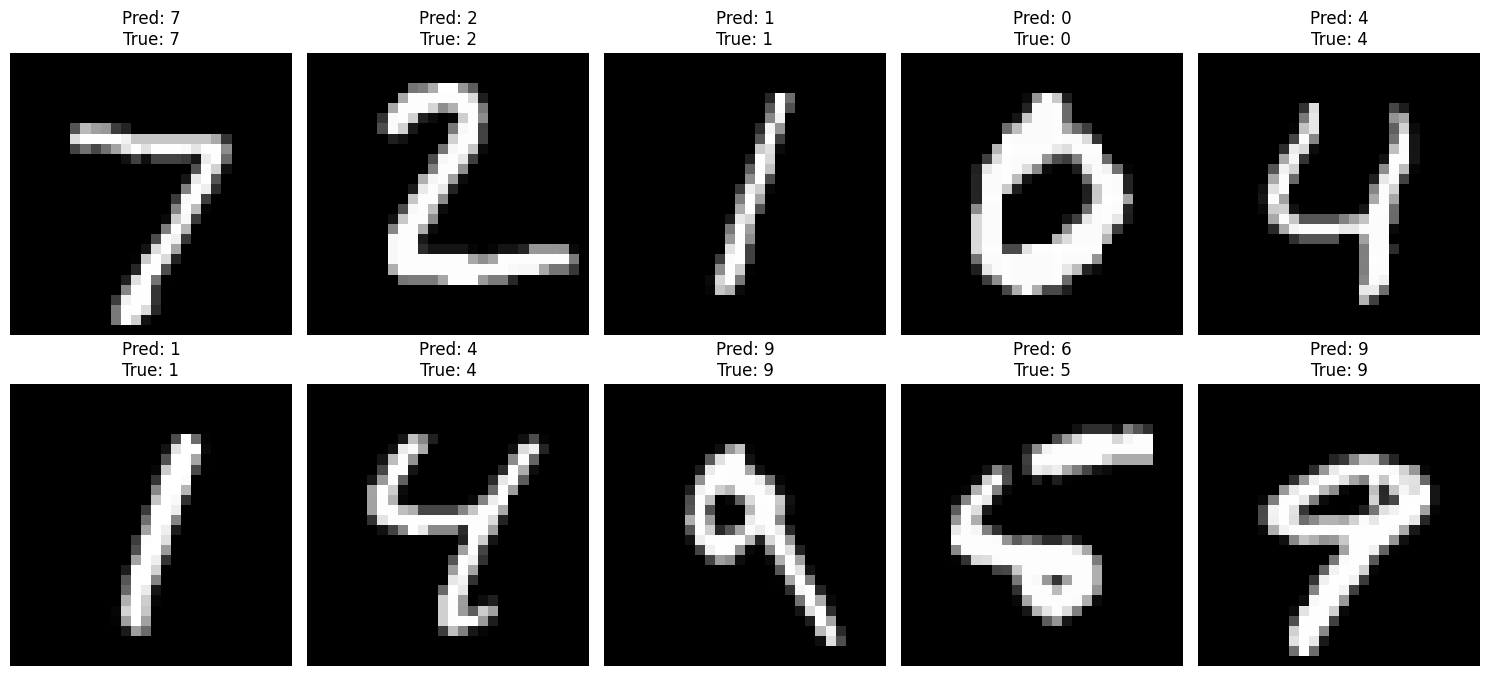


Final Test Accuracy: 0.9639


In [ ]:

plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
